<a href="https://colab.research.google.com/github/zShadil/GIT-Assignment/blob/main/Intermediate_assessment__Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:
file_path_train = "/content/train.csv"
file_path_test = "/content/test.csv"

hr_data_train = pd.read_csv(file_path_train)
hr_data_test = pd.read_csv(file_path_test)

In [4]:
print ('The Shape of Train =' , hr_data_train.shape)
print ('The Shape of Test =' , hr_data_test.shape)

The Shape of Train = (54808, 14)
The Shape of Test = (23490, 13)


In [5]:
hr_data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
hr_data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
hr_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
hr_data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
hr_data_train.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [10]:
hr_data_train.size

767312

In [11]:
hr_data_train.shape

(54808, 14)

In [12]:
hr_data_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [13]:
# Fill missing values in train data
hr_data_train['previous_year_rating'] = hr_data_train['previous_year_rating'].fillna(
    hr_data_train['previous_year_rating'].median()
)

In [14]:
hr_data_train.duplicated().sum()

np.int64(0)

In [15]:
hr_data_train.isnull().sum()


,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [16]:
# Check class distribution (Target Variable)
hr_data_train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [17]:
# Separate categorical and numerical columns
categorical = list(hr_data_train.select_dtypes(include=['object']).columns)
numerical = list(hr_data_train.select_dtypes(include=['number']).columns)

print("Categorical Columns:", categorical)
print("Numerical Columns:", numerical)

Categorical Columns: ['department', 'region', 'education', 'gender', 'recruitment_channel']
Numerical Columns: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


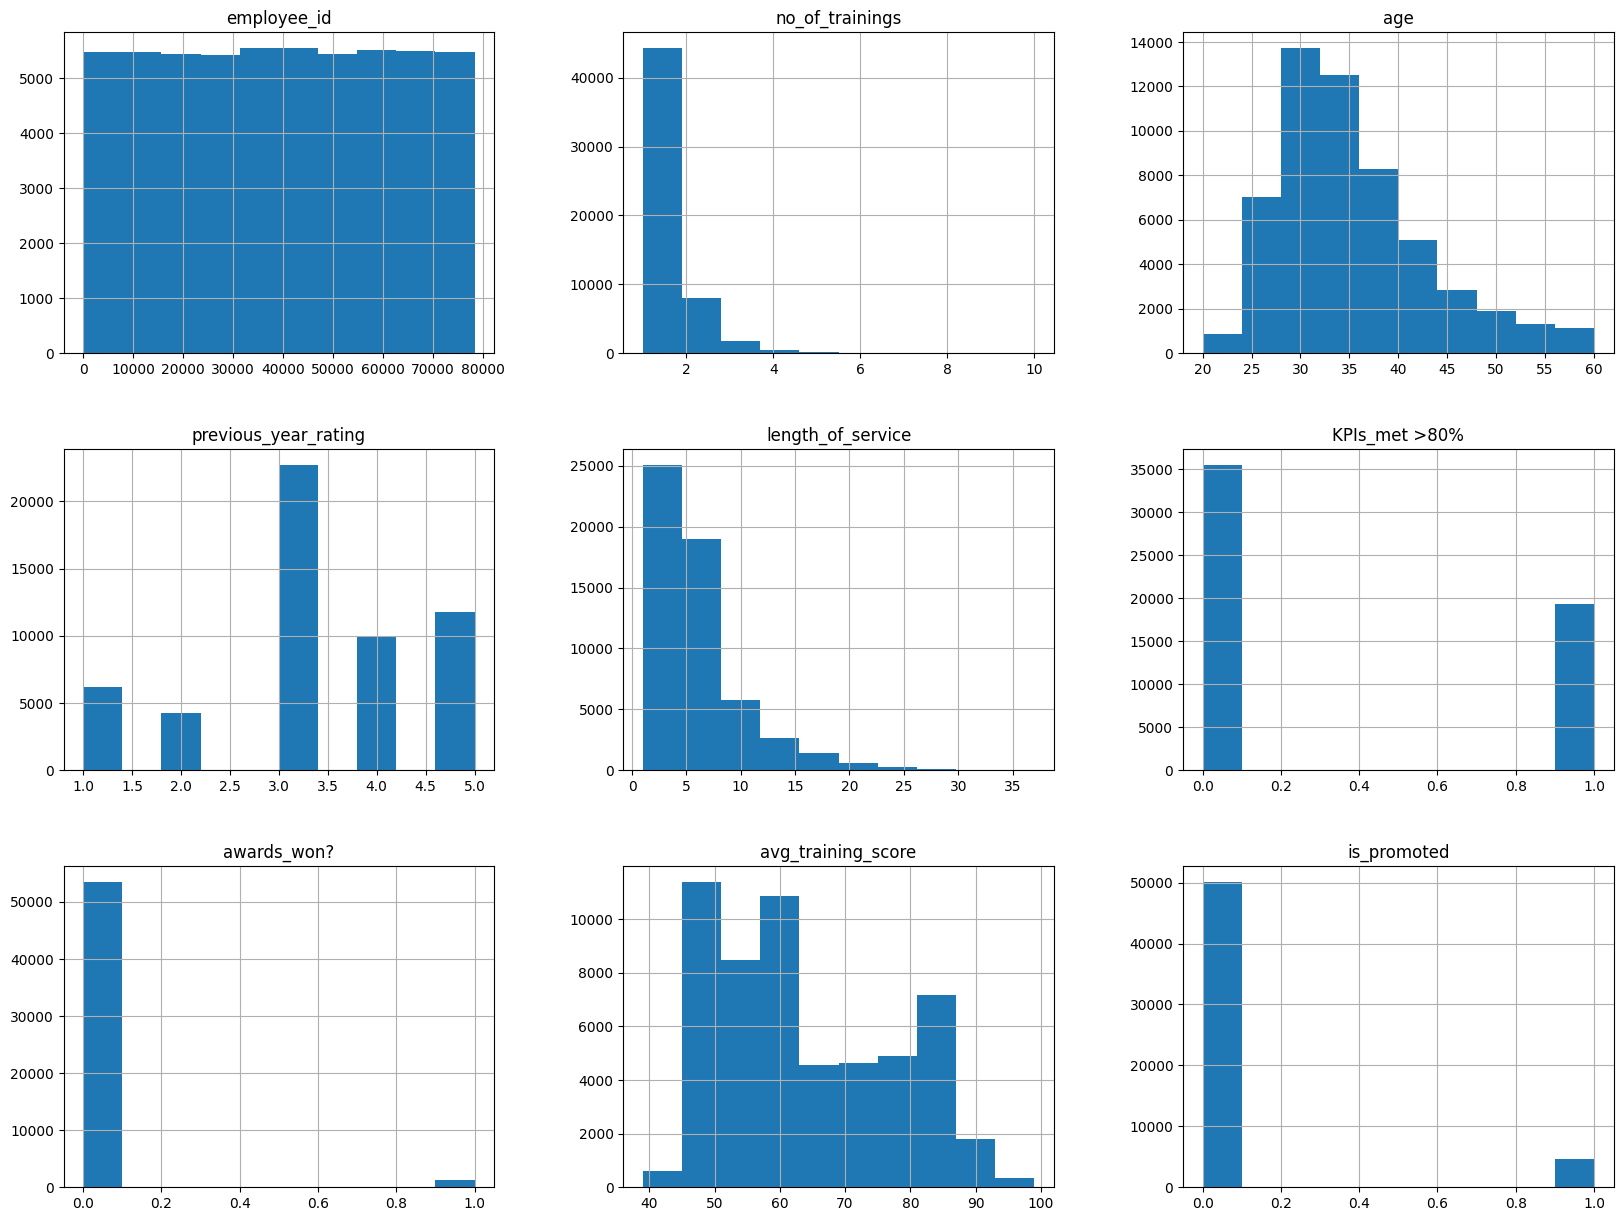

In [18]:
# Plot histograms for numerical columns
freqgraph = hr_data_train.select_dtypes(include='number')
freqgraph.hist(figsize=(20, 15))
plt.show()

In [19]:
# Find mode from training data
mode_education = hr_data_train['education'].mode()[0]

# Fill missing values in train data
hr_data_train['education'] = hr_data_train['education'].fillna(mode_education)

# Fill missing values in test data (use same mode)
hr_data_test['education'] = hr_data_test['education'].fillna(mode_education)

In [20]:
hr_data_train['previous_year_rating'] = hr_data_train['previous_year_rating'].fillna(
    hr_data_train['previous_year_rating'].median()
)

In [21]:
hr_data_train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


##Detecting Outliers and Handling

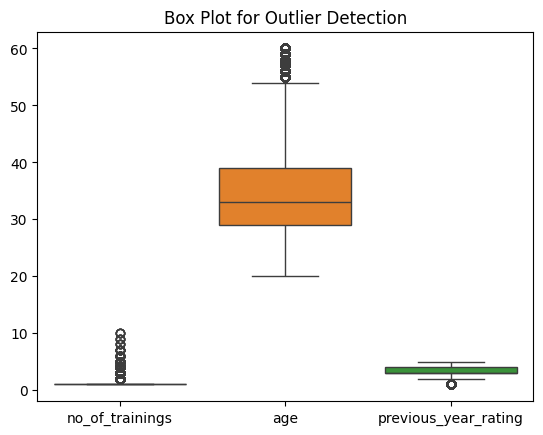

In [22]:
# Detect outliers using boxplot
sns.boxplot(data=hr_data_train[['no_of_trainings', 'age', 'previous_year_rating']])
plt.title("Box Plot for Outlier Detection")
plt.show()

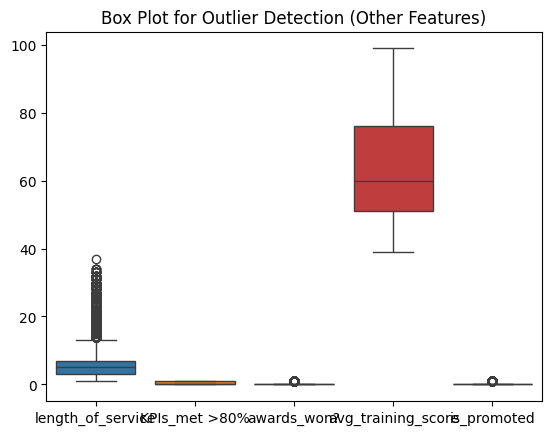

In [23]:
# Boxplot for remaining numerical features
sns.boxplot(data=hr_data_train[
    ['length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
])
plt.title("Box Plot for Outlier Detection (Other Features)")
plt.show()

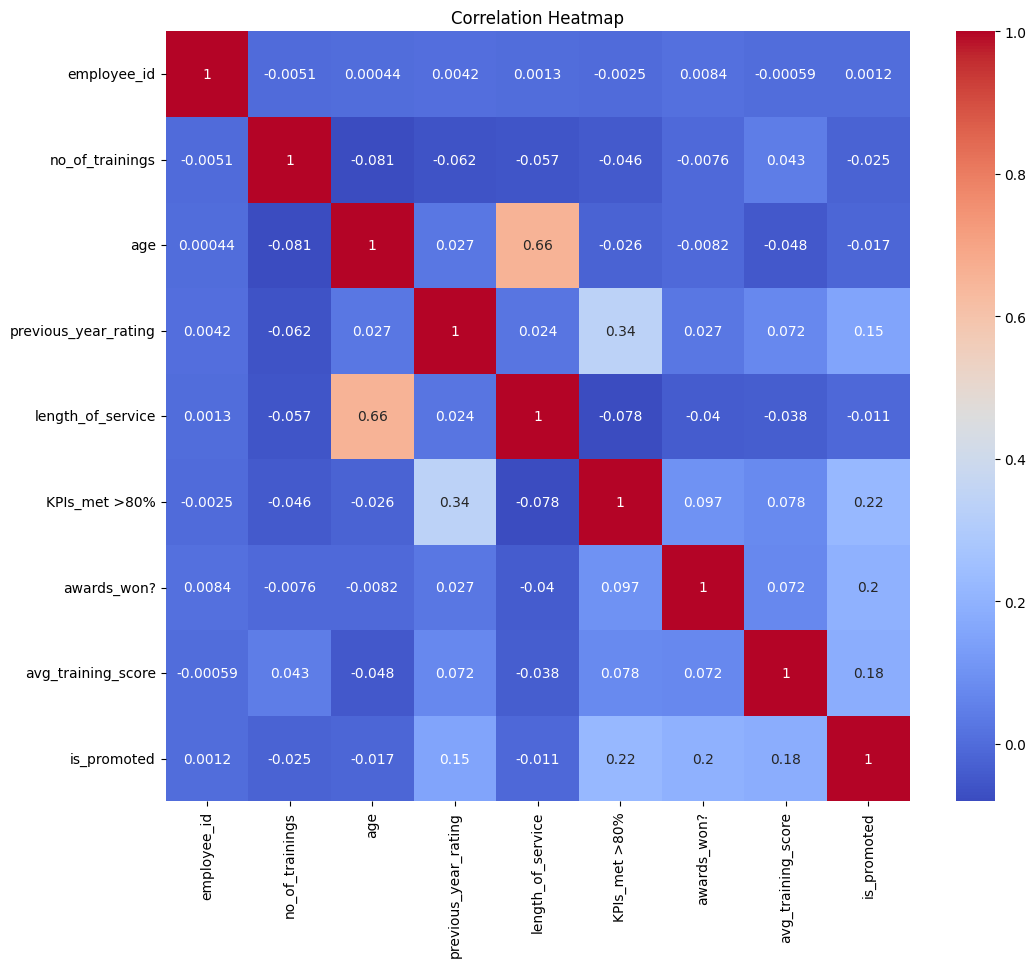

In [24]:
# Correlation heatmap for numerical features
trn1 = hr_data_train.select_dtypes(include=['number'])

corr = trn1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Save employee_id first (for submission)
if 'employee_id' in hr_data_test.columns:
    emp_id = hr_data_test['employee_id']

# Then drop from train and test
hr_data_train = hr_data_train.drop(['employee_id'], axis=1, errors='ignore')
hr_data_test = hr_data_test.drop(['employee_id'], axis=1, errors='ignore')

##Encoding


In [26]:
X = hr_data_train.drop('is_promoted', axis=1)
y = hr_data_train['is_promoted']

In [27]:
# One-hot encode TRAIN
X_encoded = pd.get_dummies(X, drop_first=True)

In [28]:
# One-hot encode TEST
test_encoded = pd.get_dummies(hr_data_test, drop_first=True)

In [29]:
# Align columns
X_encoded, test_encoded = X_encoded.align(
    test_encoded,
    join='left',
    axis=1,
    fill_value=0
)

# Remove NaN
X_encoded = X_encoded.fillna(0)
test_encoded = test_encoded.fillna(0)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


#splitting

#Scaling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test_encoded)

In [33]:
# Create Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

# Train model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [34]:
# Accuracy
train_acc = rf.score(X_train, y_train)
valid_acc = rf.score(X_valid, y_valid)

print("Training Accuracy :", train_acc)
print("Validation Accuracy :", valid_acc)

Training Accuracy : 0.9997491219267436
Validation Accuracy : 0.9376938514869549


In [35]:
# Predict on validation data
y_valid_pred = rf.predict(X_valid)

In [36]:
# Calculate metrics
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.9376938514869549
Precision: 0.8640776699029126
Recall   : 0.29405286343612336
F1 Score : 0.4387838948233361


In [37]:
# Confusion Matrix
cm = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_valid, y_valid_pred))

Confusion Matrix:
 [[10012    42]
 [  641   267]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.86      0.29      0.44       908

    accuracy                           0.94     10962
   macro avg       0.90      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962



In [38]:
# Predict on test dataset
test_predictions = rf.predict(test_encoded)

##Logistic Regression Model


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [40]:
# Logistic Regression Model

lr = LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced")

# Train
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [41]:
# Predict
y_valid_pred_lr = lr.predict(X_valid_scaled)

In [42]:
# Scores
print("Training Accuracy :", lr.score(X_train_scaled, y_train))
print("Validation Accuracy :", lr.score(X_valid_scaled, y_valid))

Training Accuracy : 0.7685763809697578
Validation Accuracy : 0.7706622879036672


In [43]:
print("\nMetrics:")
print("Accuracy :", accuracy_score(y_valid, y_valid_pred_lr))
print("Precision:", precision_score(y_valid, y_valid_pred_lr))
print("Recall   :", recall_score(y_valid, y_valid_pred_lr))
print("F1 Score :", f1_score(y_valid, y_valid_pred_lr))


Metrics:
Accuracy : 0.7706622879036672
Precision: 0.24361430395913156
Recall   : 0.8403083700440529
F1 Score : 0.3777227722772277


In [44]:
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred_lr))
print("\nClassification Report:\n", classification_report(y_valid, y_valid_pred_lr))


Confusion Matrix:
 [[7685 2369]
 [ 145  763]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86     10054
           1       0.24      0.84      0.38       908

    accuracy                           0.77     10962
   macro avg       0.61      0.80      0.62     10962
weighted avg       0.92      0.77      0.82     10962



In [45]:
# Test prediction
test_pred_lr = lr.predict(test_scaled)

##KNN Model


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
# KNN Model

knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_scaled, y_train)

# Predict
y_valid_pred_knn = knn.predict(X_valid_scaled)

# Scores
print("Training Accuracy :", knn.score(X_train_scaled, y_train))
print("Validation Accuracy :", knn.score(X_valid_scaled, y_valid))

print("\nMetrics:")
print("Accuracy :", accuracy_score(y_valid, y_valid_pred_knn))
print("Precision:", precision_score(y_valid, y_valid_pred_knn))
print("Recall   :", recall_score(y_valid, y_valid_pred_knn))
print("F1 Score :", f1_score(y_valid, y_valid_pred_knn))

print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_valid_pred_knn))
print("\nClassification Report:\n", classification_report(y_valid, y_valid_pred_knn))

Training Accuracy : 0.9266523742188569
Validation Accuracy : 0.9161649334063127

Metrics:
Accuracy : 0.9161649334063127
Precision: 0.47619047619047616
Recall   : 0.1211453744493392
F1 Score : 0.19315188762071994

Confusion Matrix:
 [[9933  121]
 [ 798  110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10054
           1       0.48      0.12      0.19       908

    accuracy                           0.92     10962
   macro avg       0.70      0.55      0.57     10962
weighted avg       0.89      0.92      0.89     10962



In [47]:
test_pred_knn = knn.predict(test_scaled)

#Model Performance Comparison


In [48]:
results = []

def evaluate_model(model, model_name, use_scaled=False):

    if use_scaled:
        y_pred = model.predict(X_valid_scaled)
        train_acc = model.score(X_train_scaled, y_train)
    else:
        y_pred = model.predict(X_valid)
        train_acc = model.score(X_train, y_train)

    results.append({
        "Model": model_name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": accuracy_score(y_valid, y_pred),
        "Precision": precision_score(y_valid, y_pred),
        "Recall": recall_score(y_valid, y_pred),
        "F1 Score": f1_score(y_valid, y_pred)
    })


results = []

evaluate_model(rf, "Random Forest", use_scaled=False)
evaluate_model(lr, "Logistic Regression", use_scaled=True)
evaluate_model(knn, "KNN", use_scaled=True)

results_df = pd.DataFrame(results)
results_df.round(3)

,Model,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.000,0.938,0.864,0.294,0.439
1,Logistic Regression,0.769,0.771,0.244,0.840,0.378
2,KNN,0.927,0.916,0.476,0.121,0.193


##Model Tuning


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

In [50]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy']
}

In [51]:
rf_base = RandomForestClassifier(random_state=42)

In [52]:
tuned_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [53]:
print("Starting tuning...")

tuned_search.fit(X_train, y_train)

best_rf_model = tuned_search.best_estimator_

print("Best Parameters:", tuned_search.best_params_)

Starting tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 200, 'max_depth': None, 'criterion': 'gini'}


In [54]:
# Predictions
val_pred_original = rf.predict(X_valid)
val_pred_tuned = best_rf_model.predict(X_valid)

metrics = {
    'Metric': ['Accuracy', 'F1-Score'],

    'Before Tuning': [
        accuracy_score(y_valid, val_pred_original),
        f1_score(y_valid, val_pred_original)
    ],

    'After Tuning': [
        accuracy_score(y_valid, val_pred_tuned),
        f1_score(y_valid, val_pred_tuned)
    ]
}

comparison_df = pd.DataFrame(metrics)

print("Model Performance Comparison")
print(comparison_df)

Model Performance Comparison
     Metric  Before Tuning  After Tuning
0  Accuracy       0.937694      0.936599
1  F1-Score       0.438784      0.433578


In [55]:
# Recreate emp_id (if missing)
emp_id = pd.read_csv("/content/test.csv")['employee_id']

In [56]:
# Predict on test dataset (TUNED MODEL)
test_pred_tuned = best_rf_model.predict(test_encoded)

# Create submission file
submission = pd.DataFrame({
    'employee_id': emp_id,
    'is_promoted': test_pred_tuned
})

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [57]:
submission = pd.DataFrame({
    'employee_id': emp_id,
    'is_promoted': test_pred_tuned
})

In [58]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [59]:
from google.colab import files

submission.to_csv('submission_rf_tuned.csv', index=False)

files.download('submission_rf_tuned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>